<a href="https://colab.research.google.com/github/AaryaBatchu/mathStuff/blob/main/EulerMethodApproximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple program to do the Euler method, improved Euler method (Heun's method), and Runge-Kutta. 

https://en.wikipedia.org/wiki/Euler_method#Example

https://en.wikipedia.org/wiki/Heun%27s_method

https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#The_Runge%E2%80%93Kutta_method

Import math!! (so we can do some math)

In [141]:
import math

Define some functions:

In [142]:
# one iteration given the method

def iter(x, y, h, method):
  if method == "euler":
    return eulerMethodStep(x, y, h)
  elif method == "improved euler":
    return improvedEulerMethodStep(x, y, h)
  elif method == "runge-kutta":
    return runge_kuttaMethodStep(x, y, h)
  else:
    print("unknown method")

In [143]:
# traditional euler method

def eulerMethodStep(x, y, h):
  return y + h*(f(x, y))

In [144]:
# improved euler method

def improvedEulerMethodStep(x, y, h):
  k1 = f(x, y)
  k2 = y + h * k1
  k3 = k1 + f(x + h, k2)
  return y + (h / 2) * k3

In [145]:
# runge-kutta method

def runge_kuttaMethodStep(x, y, h):
  k1 = f(x, y)
  k2 = f(x + h/2, y + h*k1/2)
  k3 = f(x + h/2, y + h*k2/2)
  k4 = f(x + h, y + h*k3)

  return y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

Define the differential equation

In [146]:
# the diff eq:
# dy/dx = e ^ (sin(4x + y))

def f(x, y):
  dydx = math.pow(math.e, math.sin(4 * x + y))

  return dydx

Actual iteration:

In [147]:
startX, startY = 1.0, 1.0

endX = 10.0
steps = 10000
step = (endX - startX) / steps

xPoints = [startX]
yPoints = [startY]

x, y = startX, startY

method = "euler"
method = "improved euler"
method = "runge-kutta"

for i in range(steps + 1):
  try:
    y, x = iter(x, y, step, method), x + step
  except TypeError:
    break
  xPoints.append(x)
  yPoints.append(y)

endX, endY = x, y

print("x_0 = %f \ny_0 = %f" % (startX, startY))
print("x_f = %f \ny_f = %f" % (endX, endY))

x_0 = 1.000000 
y_0 = 1.000000
x_f = 10.000900 
y_f = 11.233572


Let's try plotting it!

In [148]:
# import matplot.pyplot to plot stuff

import matplotlib.pyplot as plt

In [149]:
# ^ if that's not working you might have to do this:

!pip3 install matplotlib

^C


x_0 = 1.000000 
y_0 = 1.000000
x_f = 10.000900 
y_f = 11.233572


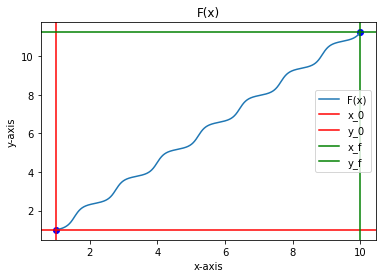

In [150]:
# simply plotting the function

fig, ax = plt.subplots()
ax.plot(xPoints, yPoints, label='F(x)')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('F(x)')

ax.axvline(x=startX, c="red", label="x_0")
ax.axhline(y=startY, c="red", label="y_0")

ax.axvline(x=endX, c="green", label="x_f")
ax.axhline(y=endY, c="green", label="y_f")
ax.scatter([startX, endX], [startY, endY], c="blue")

ax.legend()

print("x_0 = %f \ny_0 = %f" % (startX, startY))
print("x_f = %f \ny_f = %f" % (endX, endY))

Now with a slope field!!

x_0 = 1.000000 
y_0 = 1.000000
x_f = 10.000900 
y_f = 11.233572


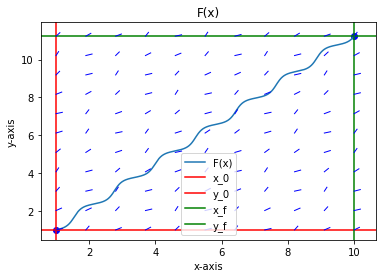

In [152]:
# same as above

fig, ax = plt.subplots()
ax.plot(xPoints, yPoints, label='F(x)')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('F(x)')

ax.axvline(x=startX, c="red", label="x_0")
ax.axhline(y=startY, c="red", label="y_0")

ax.axvline(x=endX, c="green", label="x_f")
ax.axhline(y=endY, c="green", label="y_f")
ax.scatter([startX, endX], [startY, endY], c="blue")

print("x_0 = %f \ny_0 = %f" % (startX, startY))
print("x_f = %f \ny_f = %f" % (endX, endY))

# –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# stuff for the slope field

# my brain wasn't working for a bit so i had to try this out on desmos: 
# https://www.desmos.com/calculator/mz5o6x7shr

sf_stepsX = 10
rangeX = endX - startX
sf_stepX = rangeX / sf_stepsX

minY = yPoints[0]
for yCoord in yPoints:
  if yCoord < minY:
    minY = yCoord
maxY = max(yPoints)

sf_stepsY = 10
rangeY = maxY - minY
sf_stepY = rangeY / sf_stepsY

l = 0.02

for i in range(0, sf_stepsX + 1, 1):
  for j in range(0, sf_stepsY + 1, 1):
    x, y = startX + (i * sf_stepX), minY + (j * sf_stepY)
    m = f(x, y)
    if m is None:
      continue
    n = l / (math.sqrt(1/(endX**2) + (m**2)/(maxY**2)))
    line = ([x, x + n], [y, y + m*n])
    ax.plot(line[0], line[1], color='blue', linewidth=1)

# comment out this line if the legend is covering too much
ax.legend()


Plot all the methods! Together!!

In [153]:
# a new diff eq so we can see what's different between the methods

def f(x, y):
  dydx = -2 * x / y

  return dydx

In [154]:
# have to rerun the actual iteration so we can 
# save all the info from all the methods

startX, startY = 1.0, 1.0

endX = 10.0
steps = 100
step = (endX - startX) / steps

xPoints = [[startX] for i in range(3)]
yPoints = [[startY] for i in range(3)]

methods = ["euler", "improved euler", "runge-kutta"]

for method in range(len(methods)):
  x, y = startX, startY

  for i in range(steps + 1):
    try:
      y, x = iter(x, y, step, methods[method]), x + step
    except TypeError:
      break
    xPoints[method].append(x)
    yPoints[method].append(y)

print(x, y)
endX, endY = x, y

10.08999999999999 -2.4566681931501124


x_0 = 1.000000 
y_0 = 1.000000
x_f = 10.090000 
y_f = -2.456668


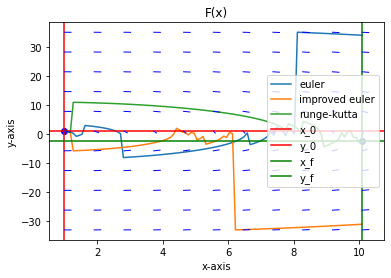

In [155]:
# plot them all together (w/ a slope field!!)

fig, ax = plt.subplots()

for method in range(len(methods)):
  ax.plot(xPoints[method], yPoints[method], label=methods[method])

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('F(x)')

ax.axvline(x=startX, c="red", label="x_0")
ax.axhline(y=startY, c="red", label="y_0")

ax.axvline(x=endX, c="green", label="x_f")
ax.axhline(y=endY, c="green", label="y_f")
ax.scatter([startX, endX], [startY, endY], c="blue")

print("x_0 = %f \ny_0 = %f" % (startX, startY))
print("x_f = %f \ny_f = %f" % (endX, endY))


sf_stepsX = 10
rangeX = endX - startX
sf_stepX = rangeX / sf_stepsX

minY = yPoints[0][0]
for method in yPoints:
  for yCoord in method:
    if yCoord < minY:
      minY = yCoord

maxY = yPoints[0][0]
for method in yPoints:
  for yCoord in method:
    if yCoord > maxY:
      maxY = yCoord

sf_stepsY = 10
rangeY = maxY - minY
sf_stepY = rangeY / sf_stepsY

l = 0.02

for i in range(0, sf_stepsX + 1, 1):
  for j in range(0, sf_stepsY + 1, 1):
    x, y = startX + (i * sf_stepX), minY + (j * sf_stepY)
    m = f(x, y)
    if m is None:
      continue
    n = l / (math.sqrt(1/(endX**2) + (m**2)/(maxY**2)))
    line = ([x, x + n], [y, y + m*n])
    ax.plot(line[0], line[1], color='blue', linewidth=1)
  
# comment out this line if the legend is covering too much
ax.legend()